### 1. Загрузка данных

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('dataset.csv')

In [5]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.433306,-4.106981,1.252722,4.842634,7.610817,1
1,-0.216705,3.832332,-10.054348,-1.106758,1.987823,0
2,8.574821,-2.495187,5.404009,-6.219058,6.954602,1
3,7.673529,-4.234502,8.135008,3.748393,3.457908,0
4,3.548824,-2.588106,-2.095070,7.993792,-3.523852,1


### 2. Exploratory Data Analysis

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Установка стиля seaborn для графиков
sns.set(style='whitegrid') 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  3000 non-null   float64
 1   feature_2  3000 non-null   float64
 2   feature_3  3000 non-null   float64
 3   feature_4  3000 non-null   float64
 4   feature_5  3000 non-null   float64
 5   target     3000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 140.8 KB


In [9]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,0.141861,0.042065,0.022336,0.023745,0.025611,0.60000
std,5.433073,5.389536,5.422549,5.340603,5.434483,0.48998
min,-12.936886,-12.810592,-13.454282,-13.194904,-13.433194,0.00000
25%,-4.095531,-4.044539,-4.101664,-4.076794,-3.951466,0.00000
50%,0.182078,0.082622,-0.024358,0.068921,0.032573,1.00000
75%,4.213366,4.009051,4.095432,4.136638,4.312101,1.00000
max,13.093660,13.866223,13.907629,13.360422,13.649220,1.00000


In [10]:
# Проверка баланса классов
data['target'].value_counts()

target
1    1800
0    1200
Name: count, dtype: int64

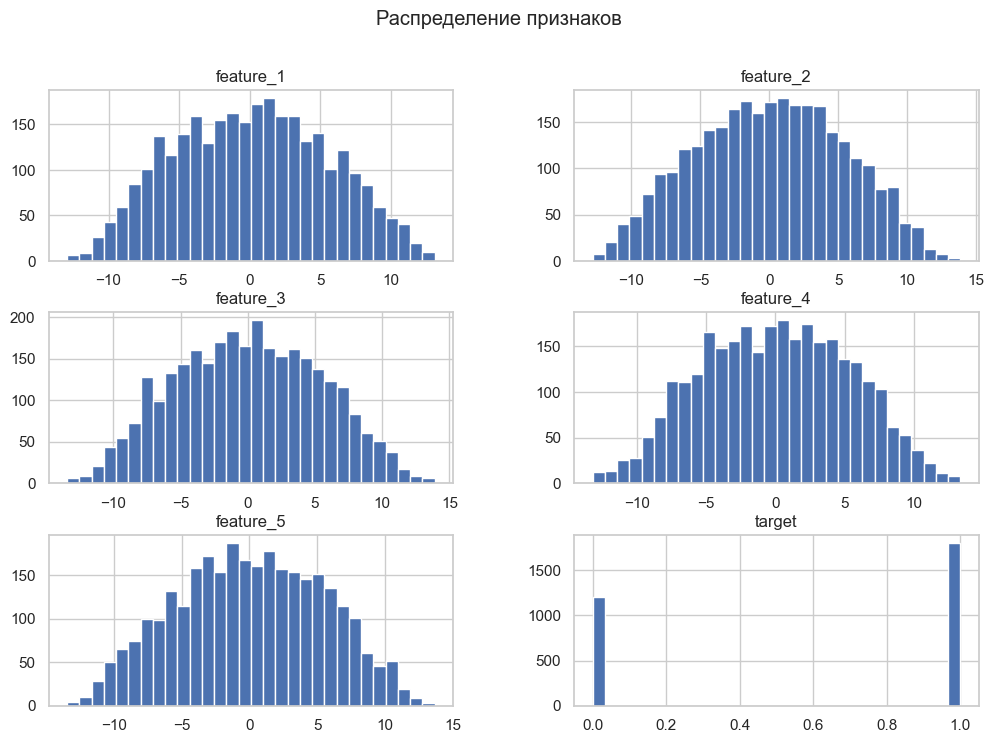

In [11]:
# Распределение признаков
data.hist(bins=30, figsize=(12, 8))
plt.suptitle('Распределение признаков')
plt.show()

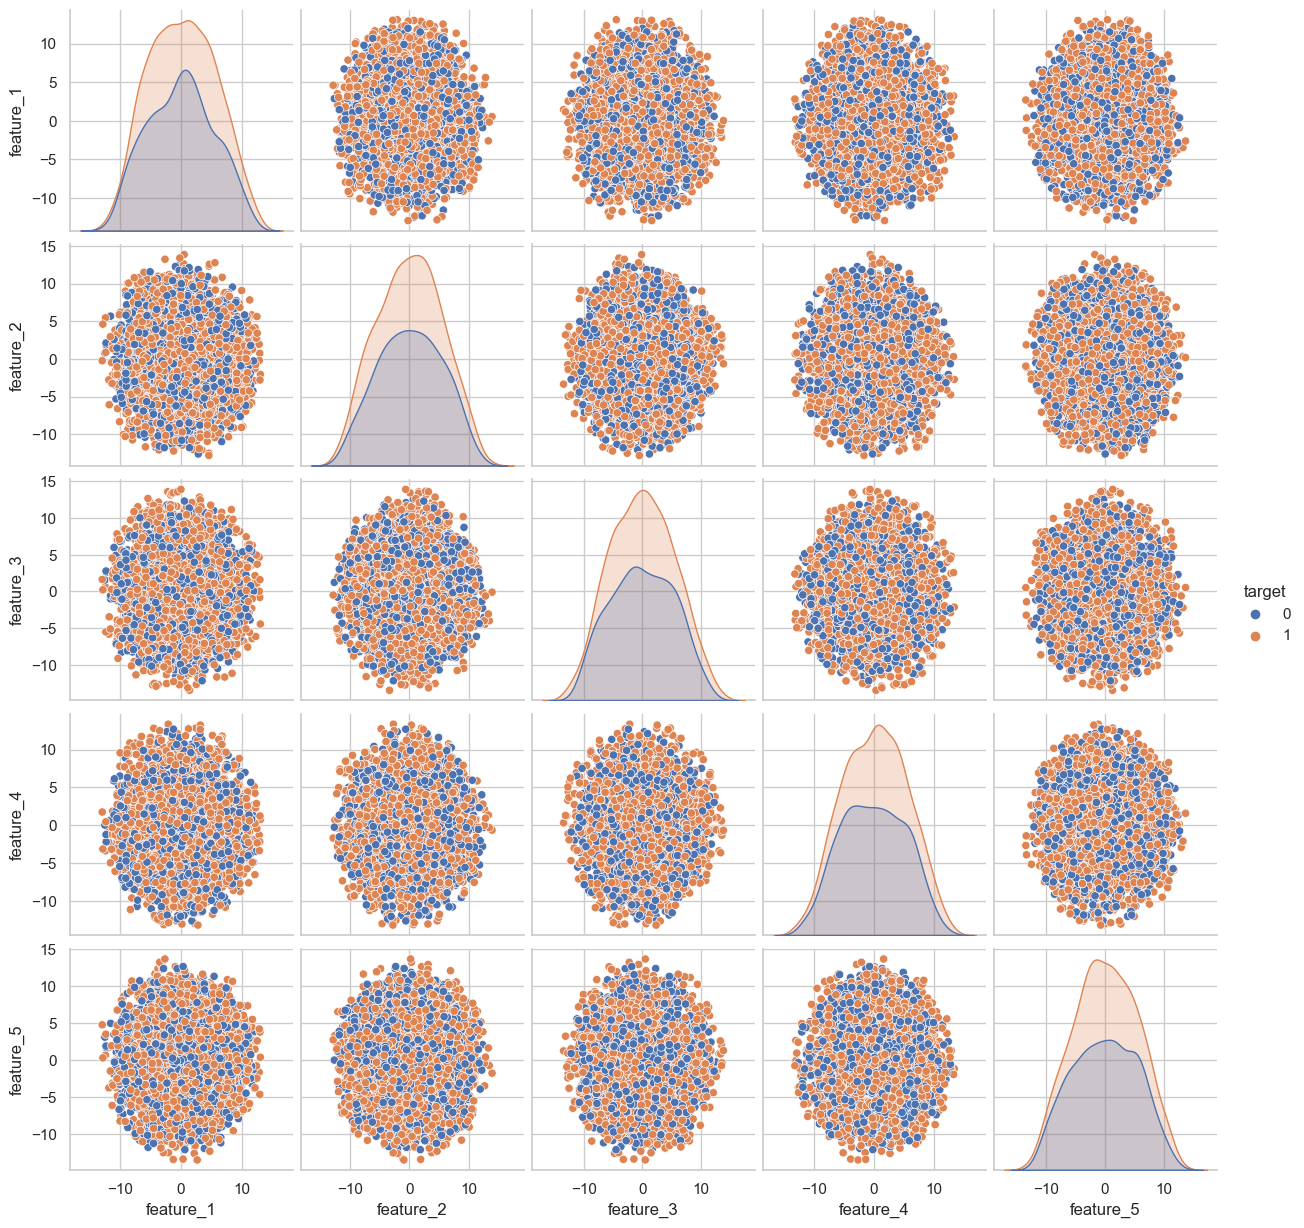

In [12]:
sns.pairplot(data, hue='target')
plt.show()

### 3. Базовая модель

Для классификации мы будем использовать алгоритм Случайного леса (Random Forest), так как он хорошо работает с разнообразными данными и не требует значительной настройки.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [15]:
# Разделение данных на признаки и целевую переменную
X = data.drop('target', axis=1)
y = data['target']

In [18]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Создание и обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Предсказание на тестовых данных
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [21]:
# Оценка модели
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.56


### 4. Уменьшение размерности

In [23]:
from sklearn.manifold import TSNE, MDS

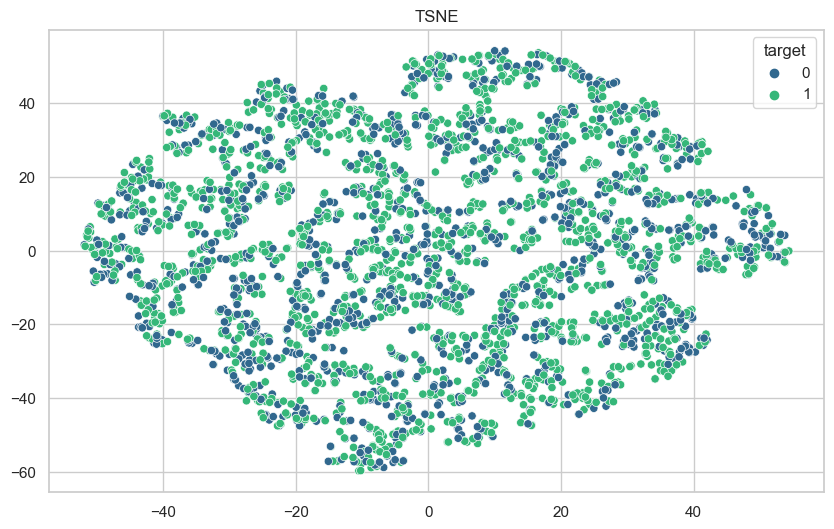

In [24]:
# TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=y, palette='viridis')
plt.title('TSNE')
plt.show()

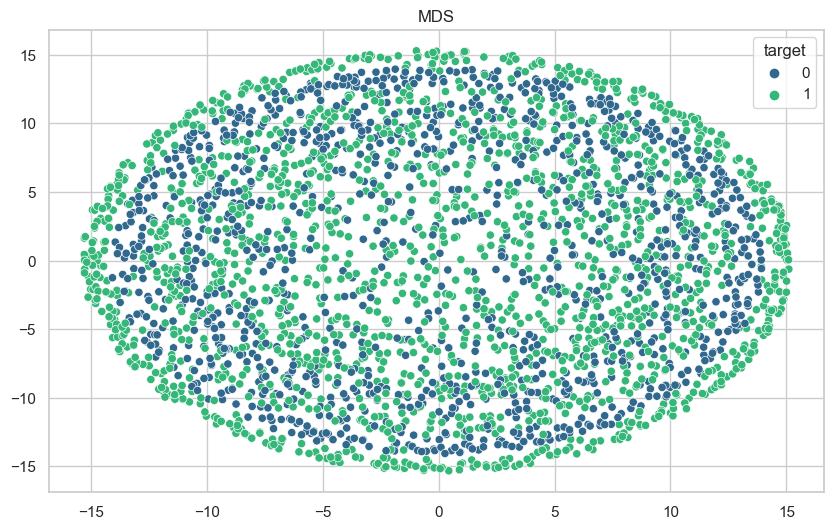

In [25]:
# MDS
mds = MDS(n_components=2, random_state=42)
mds_results = mds.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_results[:, 0], y=mds_results[:, 1], hue=y, palette='viridis')
plt.title('MDS')
plt.show()

### 5. Генерация новых признаков

In [26]:
from sklearn.metrics import pairwise_distances

In [27]:
# Вычислим евклидово расстояние между точками
distances = pairwise_distances(mds_results, metric='euclidean')

# Добавим среднее расстояние до других точек как новый признак
data['mean_distance'] = distances.mean(axis=1)

In [28]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target,mean_distance
0,0.433306,-4.106981,1.252722,4.842634,7.610817,1,13.600165
1,-0.216705,3.832332,-10.054348,-1.106758,1.987823,0,11.625027
2,8.574821,-2.495187,5.404009,-6.219058,6.954602,1,17.113331
3,7.673529,-4.234502,8.135008,3.748393,3.457908,0,15.350586
4,3.548824,-2.588106,-2.095070,7.993792,-3.523852,1,11.138416


In [32]:
# Обновим данные
X = data.drop('target', axis=1)
y = data['target']

In [ ]:
# Разделим данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Обучим модель
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [31]:
# Оценим качество модели
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.90


### 6. ROC AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

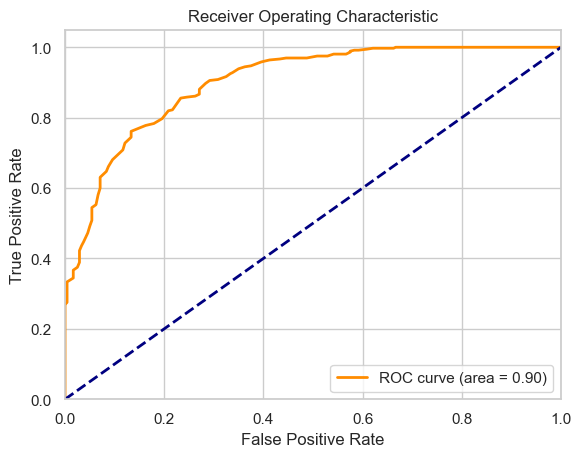

In [34]:
# Построение ROC кривой
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()